# Chronic Kidney Disease
In this notebook, I plan to analyze a dataset containing health metrics, process data and create a model which will predict if a person has chronic kidney diseases. The dataset contains the following features:
- **Age** (numerical): age in years  
- **Blood Pressure** (numerical): bp in mm/Hg  
- **Specific Gravity** (nominal): sg - (1.005, 1.010, 1.015, 1.020, 1.025)  
- **Albumin** (nominal): al - (0, 1, 2, 3, 4, 5)  
- **Sugar** (nominal): su - (0, 1, 2, 3, 4, 5)  
- **Red Blood Cells** (nominal): rbc - (normal, abnormal)  
- **Pus Cell** (nominal): pc - (normal, abnormal)  
- **Pus Cell Clumps** (nominal): pcc - (present, not present)  
- **Bacteria** (nominal): ba - (present, not present)  
- **Blood Glucose Random** (numerical): bgr in mg/dl  
- **Blood Urea** (numerical): bu in mg/dl  
- **Serum Creatinine** (numerical): sc in mg/dl  
- **Sodium** (numerical): sod in mEq/L  
- **Potassium** (numerical): pot in mEq/L  
- **Hemoglobin** (numerical): hemo in gms  
- **Packed Cell Volume** (numerical)  
- **White Blood Cell Count** (numerical): wc in cells/cumm  
- **Red Blood Cell Count** (numerical): rc in millions/cmm  
- **Hypertension** (nominal): htn - (yes, no)  
- **Diabetes Mellitus** (nominal): dm - (yes, no)  
- **Coronary Artery Disease** (nominal): cad - (yes, no)  
- **Appetite** (nominal): appet - (good, poor)  
- **Pedal Edema** (nominal): pe - (yes, no)  
- **Anemia** (nominal): ane - (yes, no)  
- **Class** (nominal): class - (ckd, not ckd)  


## Library Import 

In [832]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

pd.set_option("future.no_silent_downcasting", True)

## Importing the dataset

In [833]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


As seen from the first rows, we have null values and data which will have to encode later(present/notpresent, normal/abnormal)

In [834]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [835]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

Some of the columns are recognized as objects even though they are numeric.Pandas  may not recognize some of the null values. This might be a problem. We can specify the datatypes manually for numerical values but that won't work for nominal data.  

In [836]:
for column in ['pcv', 'wc', 'rc']:
    try:
        df[column] = df[column].astype(float)
    except ValueError as err:
        print(f'{column}: {err}')

pcv: could not convert string to float: '\t?'
wc: could not convert string to float: '\t?'
rc: could not convert string to float: '\t?'


Some null values are marked with question mark. We should replace these values by nan.

In [837]:
df.replace('\t?', np.nan, inplace=True)
for column in ['pcv', 'wc', 'rc']:
    df[column] = df[column].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

This change, increased the null values by one for these columns. 

## Encoding the data
We have a lot of text columns that need to be encoded so we could train our model. Fortunately these columns mostly contains binary data. Since we have null values, using an encoder like LabelEncoder and OneHotEncoder will mess up with the data, it may label nulls as values, so for our convenience we will just replace the values with 1s and 0s. 

In [838]:
df.columns = df.columns.str.strip()
df = df.apply(lambda x: x.str.replace('\t', '', regex=True).str.strip() if x.dtype == 'object' else x)
for column in ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']:
    df[column] = df[column].replace({'normal': 1, 'present': 1, 'yes': 1, 'ckd': 1,
                                     'abnormal': 0, 'notpresent': 0, 'no': 0, 'notckd': 0, 'good': 1, 'poor': 0})
for column in df.columns:
    df[column] = df[column].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    float64
 7   pc              335 non-null    float64
 8   pcc             396 non-null    float64
 9   ba              396 non-null    float64
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

### Handling missing values
We will try 5 methods for handling missing values:
- dropping null rows
- replacing null values with -1
- knn inputter
- simple inputer(strategy mean)
- mice
before that, let's see how many null values there are.

<Axes: >

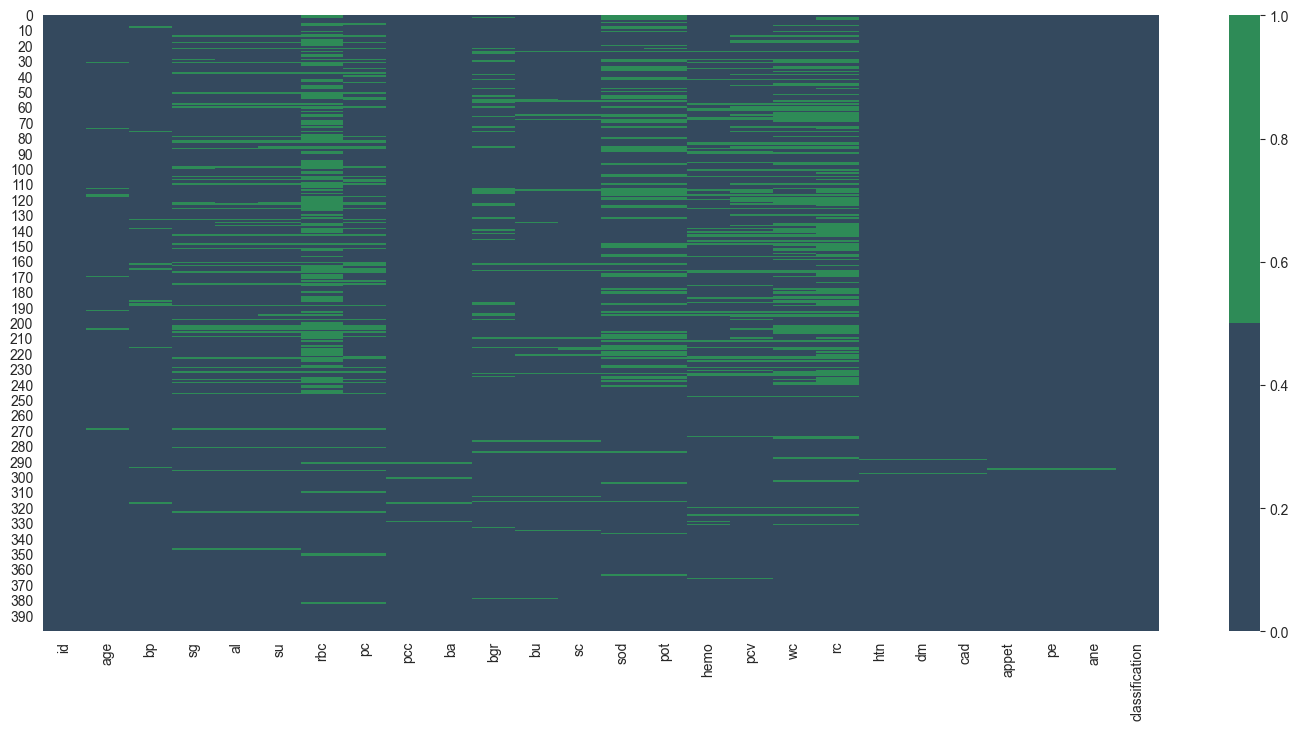

In [839]:
plt.figure(figsize=(18, 8))

colours = ['#34495E', 'seagreen']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

As seen from this histogram, the columns with most null values are rbc, sod, pot, rc, wc.

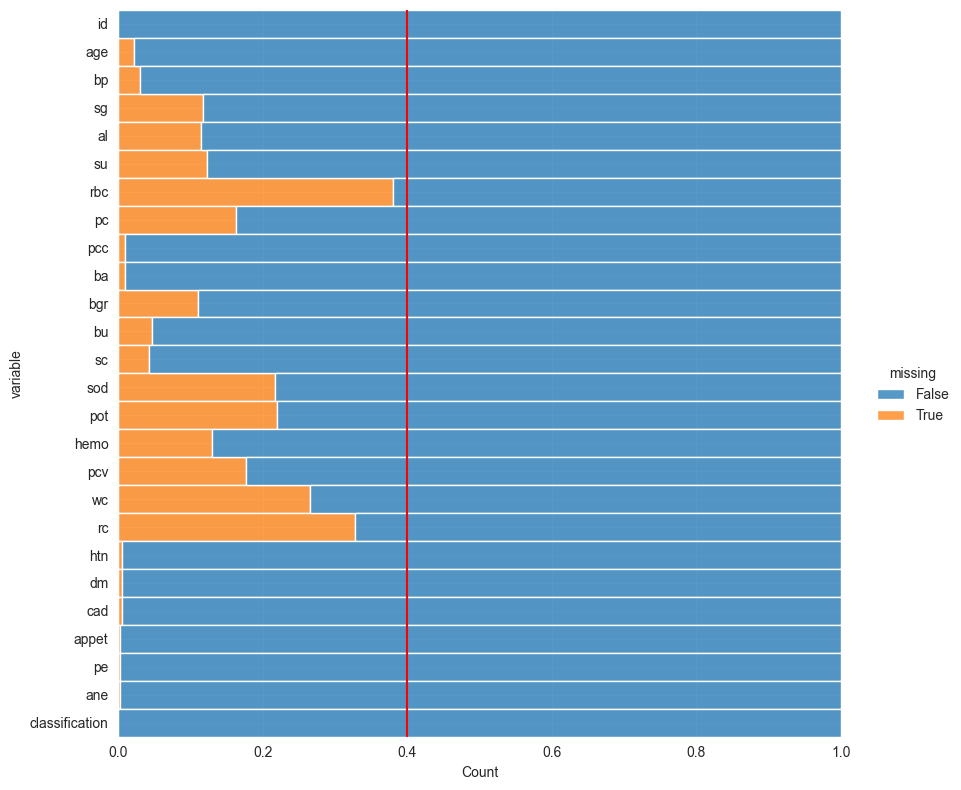

In [840]:
sns.displot(
    data=df.isnull().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    height=8,
    aspect=1.1
)

# specifying a threshold value
plt.axvline(0.4, color='r')

Our observation can be more clearly be seen in this plot.  

#### Creating our datasets 

In [841]:
datasets = {
    # Dropping rows that have nulls
    'Dropped null values': df.dropna(how='any', axis=0),
    # Replacing null values with -1
    'Filled with -1': df.fillna(value=-1),
    # KNNImputer with different parameters
    'knn with n=2': pd.DataFrame(KNNImputer(n_neighbors=2).fit_transform(df), columns=df.columns),
    'knn with n=3': pd.DataFrame(KNNImputer(n_neighbors=3).fit_transform(df), columns=df.columns),
    'knn with n=4': pd.DataFrame(KNNImputer(n_neighbors=4).fit_transform(df), columns=df.columns),
    # SimpleImputer with strategy mean
    'SimpleImputer with mean strategy': pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(df), columns=df.columns),
    # Mice
    'Mice': pd.DataFrame(IterativeImputer(max_iter=10, random_state=42).fit_transform(df), columns=df.columns),
}

results = {}

for name, dataset in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(dataset.drop('classification', axis=1), dataset['classification'],
                                                        test_size=0.6,
                                                        random_state=42)
    # Train Logistic Regression
    lr_model = LogisticRegression(max_iter=10000)
    lr_model.fit(X_train, y_train)
    lr_pred = lr_model.predict(X_test)
    lr_accuracy = accuracy_score(y_test, lr_pred)
# 
    # Train Decision Tree Classifier
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train, y_train)
    dt_pred = dt_model.predict(X_test)
    dt_accuracy = f1_score(y_test, dt_pred)

    # Store the results
    results[name] = {'Logistic Regression Accuracy': lr_accuracy, 'Decision Tree Accuracy': dt_accuracy, 'Average Accuracy': (lr_accuracy+dt_accuracy)/2}

results_df = pd.DataFrame(results).T  # Transpose for better readability
results_df.reset_index(inplace=True)
results_df.columns = ['Imputation Strategy', 'Logistic Regression Accuracy', 'Decision Tree Accuracy', 'Average Accuracy']

results_df

,Imputation Strategy,Logistic Regression Accuracy,Decision Tree Accuracy,Average Accuracy
0,Dropped null values,0.989474,0.920000,0.954737
1,Filled with -1,1.000000,0.996721,0.998361
2,knn with n=2,0.970833,0.996721,0.983777
3,knn with n=3,0.970833,0.996721,0.983777
4,knn with n=4,0.975000,0.996721,0.985861
5,SimpleImputer with mean strategy,0.979167,0.996721,0.987944
6,Mice,0.975000,0.996721,0.985861


Well, the main observation is that the type of imputer didn't influence that much decision tree accuracy except for when we dropped null values, so the score mainly depends on logistic regression accuracy. We see that the one that won is filled with -1 and the second one is mean strategy. K nearest neighbour with param 4 and Mice have similar performance and knn with n=2 and n=3 too. Dropping null values gives high score for logistic regression but lower for decision tree. For next steps, I will choose mice dataset.

In [842]:
df = datasets['Mice']

# Support Vector Machines
## Tuning
Firstly, we will try to find best params

In [843]:
params = {
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'degree': [2, 3],  
    'gamma': [0.1, 1, 'scale'],  
    'probability': [True, False],  
}

grid = GridSearchCV(SVC(random_state=42), param_grid=params, cv=5, n_jobs=2, verbose=2)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
1.0 {'degree': 2, 'gamma': 0.1, 'kernel': 'linear', 'probability': True}


## Getting performance metrics

In [844]:
svc_model = SVC(random_state=42, **{'degree': 2, 'gamma': 0.1, 'kernel': 'linear', 'probability': True})
svc_model.fit(X_train, y_train)
y_predicted = svc_model.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        88
         1.0       1.00      0.99      1.00       152

    accuracy                           1.00       240
   macro avg       0.99      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



We got perfect score. This might be because we have a very small dataset to train to test, only 400 records, that's why we have inflated performance scores for all models and in real life the model might be not as good. 

## Comparing with other models

In [845]:
bernoulli_bayes = BernoulliNB()
bernoulli_bayes.fit(X_train, y_train)
predicted_churn_bernoulli_bayes = bernoulli_bayes.predict(X_test)
print(classification_report(predicted_churn_bernoulli_bayes, y_test))

              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86       108
         1.0       0.84      0.97      0.90       132

    accuracy                           0.88       240
   macro avg       0.90      0.87      0.88       240
weighted avg       0.89      0.88      0.88       240



In [846]:
decision_tree = DecisionTreeClassifier(random_state=42,
                                       **{'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None,
                                          'min_impurity_decrease': 0.01, 'min_samples_leaf': 1, 'min_samples_split': 2,
                                          'min_weight_fraction_leaf': 0.05})
decision_tree.fit(X_train, y_train)
dt_predicted = decision_tree.predict(X_test)
print(classification_report(y_test, dt_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        88
         1.0       1.00      1.00      1.00       152

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



As we see, decision tree has best score on this dataset, SVM being second, BernoulliNB has the worst score having 0.88 and logistic regression and Random Forest have 0.97 and 0.99. The reason why Decision Tree might be slightly ahead on Random Forest is because it uses different parameters.

## Preprocessing techniques
Let's see if we can improve and get a perfect score for svm using PCA. 
### Transform and split


In [847]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df.drop('classification', axis=1))

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X_pca, df['classification'], test_size=0.4, random_state=42)

### Training SVC

In [848]:
svc_model = SVC(random_state=42, **{'degree': 2, 'gamma': 0.1, 'kernel': 'linear', 'probability': True})
svc_model.fit(X_train, y_train)
y_predicted = svc_model.predict(X_test)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        58
         1.0       1.00      0.99      1.00       102

    accuracy                           0.99       160
   macro avg       0.99      1.00      0.99       160
weighted avg       0.99      0.99      0.99       160



As we see, the performance hasn't changed a little, except precision is slightly behind.
# Conclusion
In this notebook, I understood how handling null values can affect our model performance. Also we could've get better results if we got more data. Now, I think that SVC is a pretty solid model for classification problems but in this case, decision trees showed a slightly better result. 